## Mini Project/Page View Time Series Visualizer

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

##### Read dataset

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

##### Dataset overview

In [3]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [4]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [5]:
df.shape

(1304, 2)

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [6]:
df = df[(df['value']>=df['value'].quantile(0.025)) &
(df['value'] <= df['value'].quantile(0.975))] 
df['date'] = pd.to_datetime(df['date'])

df_line = df.set_index('date')
df_line.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### Draw a line chart using Matplotlib 

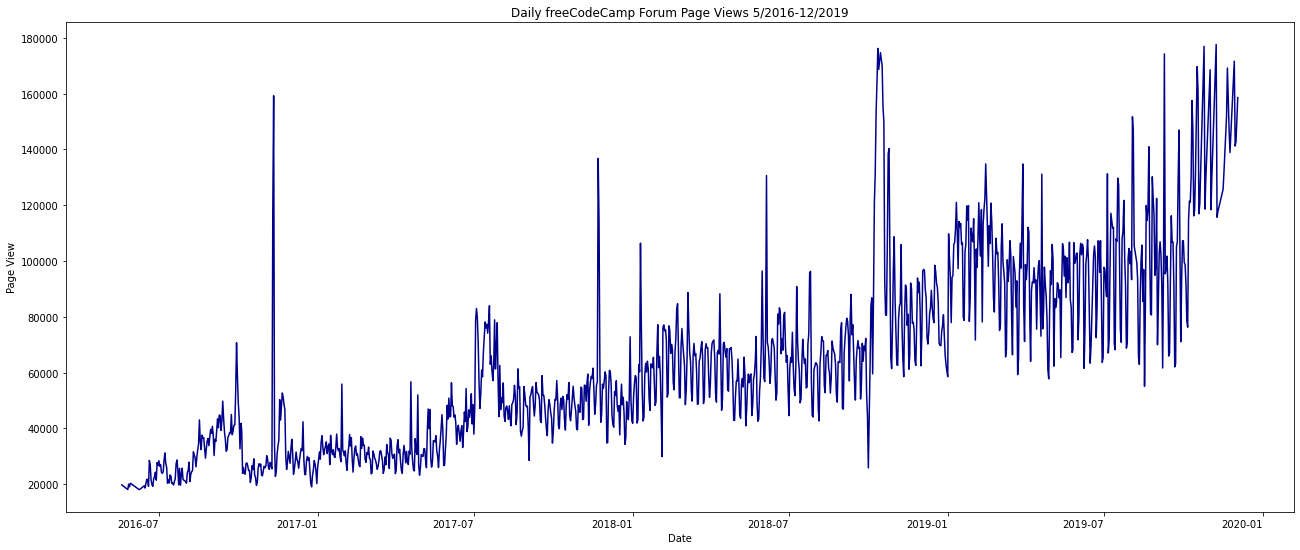

In [7]:
fig, ax=plt.subplots(figsize=(22, 10))

df_line.plot(kind='line', ax=ax, xlabel='Date', ylabel='Page View', color='darkblue', legend=False)

plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xticks(rotation=0)

plt.show()

#### Clean the data to draw a bar chart. It should show average daily page views for each month grouped by year

In [8]:
df_bar = df.copy()
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month

df_bar = df_bar.groupby([df_bar['year'], df_bar['month']]).mean().round(0)
df_bar.head()


value
year month         
2016 5      19432.0
     6      21875.0
     7      24110.0
     8      31049.0
     9      41477.0

#### Draw a bar chart. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views"

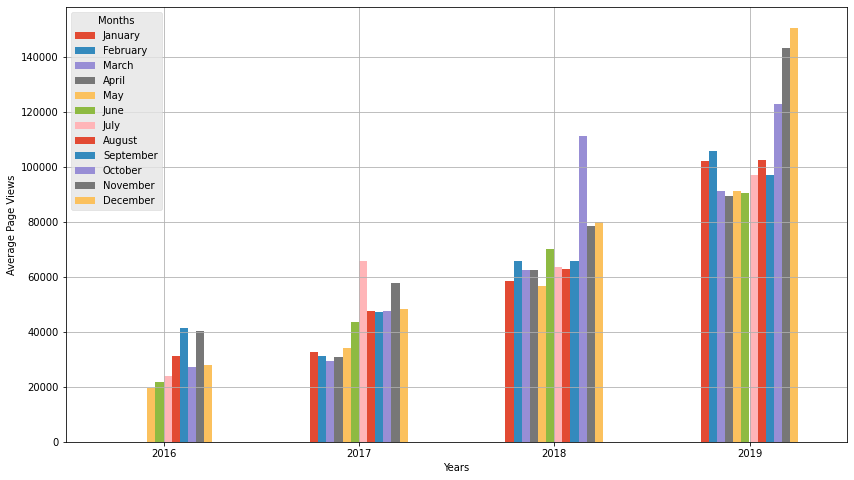

In [9]:
fig, ax = plt.subplots(figsize=(14, 8))

plt.style.use('ggplot')
df_bar.unstack().plot(kind='bar', ax=ax, xlabel='Years', ylabel='Average Page Views')

ax.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')

plt.xticks(rotation=0)

plt.show()

#### Clean the data to draw two adjacent box plots using Seaborn. These box plots should show how the values are distributed within a given year or month and how it compares over time. 

In [10]:
df_box = df.copy()

df_box.reset_index(drop=True, inplace=True)
df_box['year'] = [date.year for date in df_box['date']]
df_box['month'] = [date.strftime('%b') for date in df_box['date']]


df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


#### The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

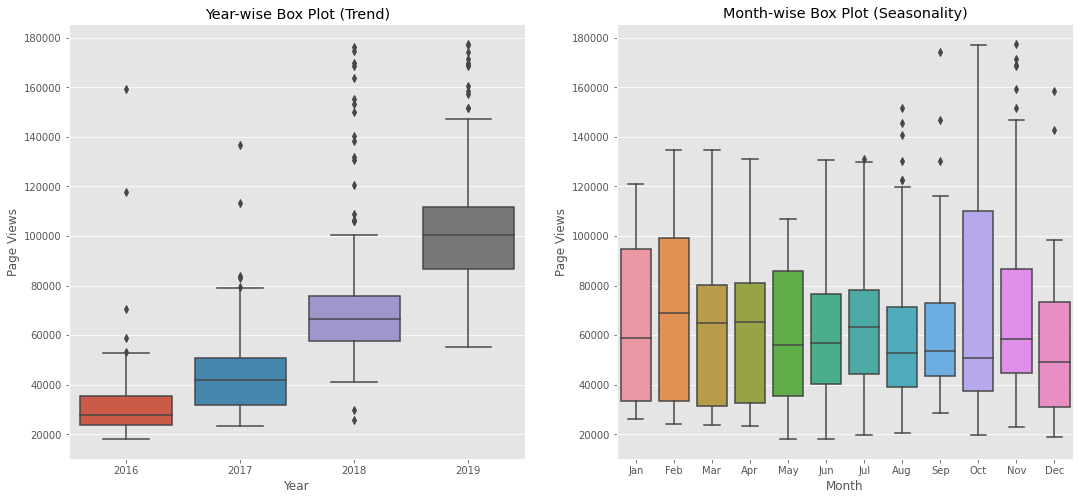

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(x='year', y='value', data = df_box,  ax=ax[0])
ax[0].set(xlabel='Year', ylabel='Page Views', title='Year-wise Box Plot (Trend)')

sns.boxplot(x='month', y='value', data = df_box, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=ax[1])
ax[1].set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')

plt.show()
